In [11]:
# Paso 1: Importar bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización  El resultado es que cada valor de píxel estará en el rango [0, 1].
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes convertirles en un vector
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding,convertir en un vector , elige el que tiene mas porcentaje
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
# Paso 4: Definir el modelo MLP #relu hace que aprenda de manera no lineal
model = models.Sequential()#Crear el modelo secuencial, lo que significa que las capas se agregan una tras otra en secuencia
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))#primera capa densa tendra 512 neuronas , la entrada será un vector de tamaño 28 x 28 = 784, que es el resultado de haber aplanado las imágenes del conjunto MNIST.
model.add(layers.Dense(256, activation='relu'))#Añade otra capa densa, pero esta vez con 256 neuronas.
model.add(layers.Dense(128, activation='relu'))#Agrega una tercera capa densa con 128 neuronas.
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida, La función de activación Softmax convierte las salidas de las 10 neuronas en probabilidades, donde la suma de las probabilidades es 1

In [15]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam',#es un algoritmo de optimización que ajusta los pesos del modelo durante el entrenamiento. Es una variante mejorada del descenso de gradiente.
              loss='categorical_crossentropy',#Utiliza la función de pérdida de entropía cruzada categórica, adecuada para problemas de clasificación multiclase.
              metrics=['accuracy'])

In [16]:
# Paso 6: Entrenar el modelo
#fit() es el que se utiliza para ajustar el modelo a los datos de entrenamiento
#Épocas: Una época es una pasada completa de todos los ejemplos de entrenamiento a través de la red neuronal. En este caso, el modelo realizará 10 épocas.

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8645 - loss: 0.4643 - val_accuracy: 0.9582 - val_loss: 0.1353
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9713 - loss: 0.0969 - val_accuracy: 0.9636 - val_loss: 0.1189
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9821 - loss: 0.0566 - val_accuracy: 0.9746 - val_loss: 0.0874
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9755 - val_loss: 0.0898
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9898 - loss: 0.0310 - val_accuracy: 0.9754 - val_loss: 0.0902
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9916 - loss: 0.0240 - val_accuracy: 0.9777 - val_loss: 0.0884
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9925 - loss: 0.0219 - val_accuracy: 0.9784 - val_loss: 0.0905
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accu

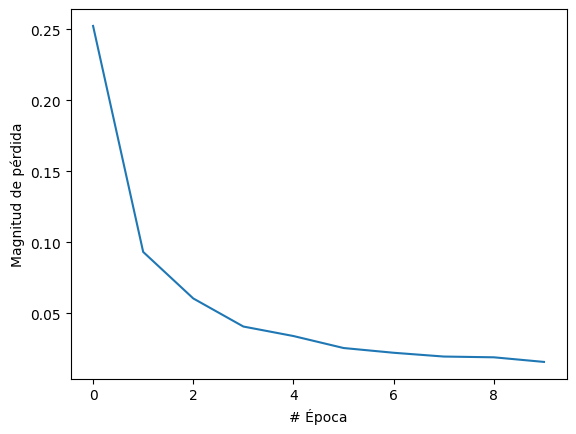

In [17]:
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

In [18]:
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9765 - loss: 0.0989
Precisión en el conjunto de prueba: 0.9803000092506409


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


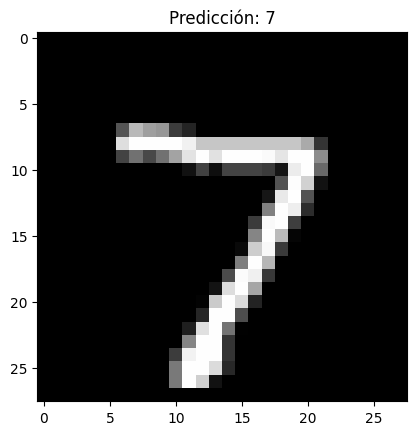

In [19]:
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen) #hacer la prediccion
digit_predicho = np.argmax(prediccion)#encuentra el indice mas grande
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción para la imagen personalizada: 0


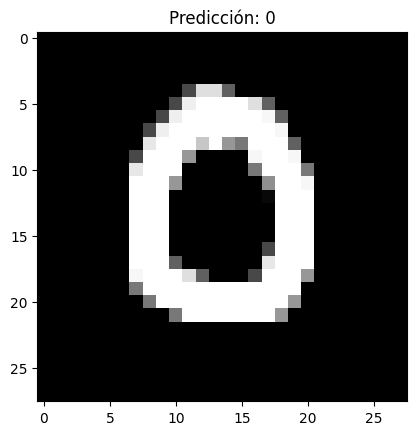

In [20]:
# Paso 9: Probar el modelo con una imagen personalizada
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('numero 0.png')